## Topic Analysis of BC Politician's Tweets using Latent Dirichlet Allocation

Here I visualize the results of the topic analysis using pyLDAvis. I am following the structure of the example at http://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/sklearn.ipynb  
which utilitzes the pyldavis package: https://github.com/bmabey/pyLDAvis
Note: Interactive graphics will not display on Github

In [47]:
from __future__ import print_function
import numpy as np
import pandas as pd
import re, nltk
from nltk.stem.porter import PorterStemmer
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from datetime import datetime as dt
timestamp = dt.now().strftime("%Y%m%d_%H-%M-%S")
print(timestamp)

20210821_22-11-54


C:\Users\spezi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
nltk.download('punkt')

C:\Users\spezi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\spezi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

## Load tweet data
Read in tweet data which was collected using 'twitter_user_dump.py'

In [82]:
data_df = pd.read_csv("JustinTrudeau_tweets.csv", header=0, delimiter=",")
df = data_df.set_index(pd.DatetimeIndex(pd.to_datetime(data_df['created_at'])))
#df = pd.groupby(df,by=[df.index.month,df.index.year])['text'].apply(lambda x: ' '.join(x)).to_frame()
df_test = df[df.created_at > '2019-09-11']

## Convert to document-term matrix
Here we convert the text into a document-term matrix, either with raw counts or in TF-IDF form.

In [12]:
# based on http://www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html
stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    # remove non letters
    text = re.sub("[^a-zA-Z0-9]", " ", text)
    #text = re.sub("[^a-zA-Z]", " ", text)
    # tokenize
    tokens = nltk.word_tokenize(text)
    # stem
    #stems = stem_tokens(tokens, stemmer)
    #return stems
    return tokens
######## 

C:\Users\spezi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
df.head()

,id,created_at,text
created_at,,,
2019-10-19 01:51:42,1185372921189076993,2019-10-19 01:51:42,The choice is clear: A Conservative majority g...
2019-10-19 01:51:39,1185372909067522049,2019-10-19 01:51:39,Le choix est clair: un gouvernement conservate...
2019-10-19 00:51:21,1185357733672996864,2019-10-19 00:51:21,It’s clear that a Trudeau-NDP coalition will k...
2019-10-19 00:51:16,1185357712705634305,2019-10-19 00:51:16,Il est clair que la coalition Trudeau-NPD supp...
2019-10-19 00:15:09,1185348626169712641,2019-10-19 00:15:09,At our BIGGEST rally in Quebec so far! It’s ti...


In [85]:
df_test.head(35)

,id,created_at,text
created_at,,,
2019-10-19 01:51:42,1185372921189076993,2019-10-19 01:51:42,The choice is clear: A Conservative majority g...
2019-10-19 01:51:39,1185372909067522049,2019-10-19 01:51:39,Le choix est clair: un gouvernement conservate...
2019-10-19 00:51:21,1185357733672996864,2019-10-19 00:51:21,It’s clear that a Trudeau-NDP coalition will k...
2019-10-19 00:51:16,1185357712705634305,2019-10-19 00:51:16,Il est clair que la coalition Trudeau-NPD supp...
2019-10-19 00:15:09,1185348626169712641,2019-10-19 00:15:09,At our BIGGEST rally in Quebec so far! It’s ti...
2019-10-19 00:15:03,1185348598617251840,2019-10-19 00:15:03,À notre PLUS GRAND rassemblement au Québec jus...
2019-10-18 19:50:24,1185281999352799232,2019-10-18 19:50:24,Trudeau will form a coalition with the NDP to ...
2019-10-18 19:50:12,1185281949377662977,2019-10-18 19:50:12,Trudeau formera une coalition avec le NPD pour...
2019-10-18 19:07:49,1185271280007831554,2019-10-18 19:07:49,RT @CPC_HQ: 🗳️ Election Day is just around th...


In [16]:
french_stop_words = ['ont','re','il', 'ne','pas','aux','ce','leur','au','c','avec','mon','un', 'd', 's','se','la','de','une','des','est','les','et','en','pour','que','qui','sur','le','l','je','j','notre','nos','votre','vos','ai','sont','du','dans','nous','vous']
english_stop_words = ['rt','this','m','so','who','on','and','of','to','is','that','s','the','a','in','as','for','with','will','i','it','you','your','we','our','t','https','are','co','my']
stop_words = french_stop_words + english_stop_words
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = stop_words,
                                lowercase = True,
                                tokenizer = tokenize,
                                max_df = 0.95, 
                                min_df = 0.05)
dtm_tf = tf_vectorizer.fit_transform(df_test.text.tolist())
print(dtm_tf.shape)

(200, 51)


C:\Users\spezi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(df_test.text.tolist())
print(dtm_tfidf.shape)

(200, 51)


C:\Users\spezi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\spezi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1799: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


## Fit Latent Dirichlet Allocation Models

In [21]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=6, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=6, random_state=0)
lda_tfidf.fit(dtm_tfidf)

C:\Users\spezi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=6, random_state=0)

## Visualizing the models with pyLDAvis

In [109]:
lda_vis_tf = pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

C:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [111]:
lda_vis_tf

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
1      37.731619        1       1  0.168971 -0.133348
0      22.572228        1       2 -0.200402  0.109706
3      16.031296        1       3 -0.135319 -0.069590
4      10.985741        1       4  0.023851 -0.141288
2       8.738723        1       5 -0.181887  0.074404
5       3.940393        1       6  0.324786  0.160116, topic_info=     Category        Freq          Term       Total  loglift  logprob
term                                                                 
65    Default   65.000000          tous   65.000000  30.0000  30.0000
66    Default  137.000000       trudeau  137.000000  29.0000  29.0000
21    Default   92.000000  conservative   92.000000  28.0000  28.0000
36    Default   51.000000          leur   51.000000  27.0000  27.0000
50    Default  175.000000          plus  175.000000  26.0000  26.0000
35    Default   73.000000        justin   73.000000  25.0000  25.0000
59    Default  569.000000             t  569.000000  24.0000  24.0000
45    Default   60.000000           new   60.000000  23.0000  23.0000
43    Default  103.000000          more  103.000000  22.0000  22.0000
27    Default   62.000000    government   62.000000  21.0000  21.0000
3     Default   48.000000         aider   48.000000  20.0000  20.0000
25    Default  146.000000           get  146.000000  19.0000  19.0000
24    Default   67.000000            du   67.000000  18.0000  18.0000
18    Default  535.000000            co  535.000000  17.0000  17.0000
31    Default  535.000000         https  535.000000  16.0000  16.0000
1     Default  137.000000         ahead  137.000000  15.0000  15.0000
8     Default   53.000000            au   53.000000  14.0000  14.0000
44    Default   56.000000            my   56.000000  13.0000  13.0000
60    Default   63.000000           tax   63.000000  12.0000  12.0000
48    Default   35.000000          pays   35.000000  11.0000  11.0000
42    Default   67.000000         money   67.000000  10.0000  10.0000
58    Default   27.000000          sont   27.000000   9.0000   9.0000
63    Default   72.000000          time   72.000000   8.0000   8.0000
55    Default   91.000000     quotidien   91.000000   7.0000   7.0000
5     Default   90.000000     ameliorer   90.000000   6.0000   6.0000
17    Default   39.000000            ce   39.000000   5.0000   5.0000
14    Default   67.000000        canada   67.000000   4.0000   4.0000
54    Default   40.000000           put   40.000000   3.0000   3.0000
62    Default   52.000000          this   52.000000   2.0000   2.0000
6     Default   50.000000           are   50.000000   1.0000   1.0000
...       ...         ...           ...         ...      ...      ...
24     Topic6    6.400888            du   67.460584   0.8788  -3.4819
16     Topic6    1.826477     canadiens   44.154728   0.0486  -4.7360
19     Topic6    0.993121         comme   26.248709  -0.0406  -5.3453
14     Topic6    2.149009        canada   67.646201  -0.2154  -4.5734
11     Topic6    1.246580          avec   42.879955  -0.3041  -5.1180
23     Topic6    0.859530        direct   36.550532  -0.5162  -5.4897
9      Topic6    0.521737       aujourd   26.766484  -0.7039  -5.9890
32     Topic6    0.496970           hui   26.764891  -0.7524  -6.0376
30     Topic6    0.383864          hier   22.105782  -0.8194  -6.2958
50     Topic6    2.265381          plus  175.359587  -1.1152  -4.5206
5      Topic6    1.111902     ameliorer   90.472311  -1.1651  -5.2323
34     Topic6    0.584295         impot   49.443923  -1.2043  -5.8757
53     Topic6    0.243257         prime   24.558656  -1.3808  -6.7520
40     Topic6    0.246502      minister   25.472047  -1.4041  -6.7387
28     Topic6    0.233863          have   24.303130  -1.4097  -6.7914
22     Topic6    0.273018        credit   28.481927  -1.4136  -6.6366
55     Topic6    0.869019     quotidien   91.088668  -1.4183  -5.4788
46     Topic6    0.303426

In [ ]:
pyLDAvis.save_html(lda_vis_tf, "lda_vis_tf.html")

In [14]:

Intertopic Distance Map (via multidimensional scaling)
Overall term frequency
Estimated term frequency within the selected topic
1. saliency(term w) = frequency(w) * [sum_t p(t | w) * log(p(t | w)/p(t))] for topics t; see Chuang et. al (2012)
2. relevance(term w | topic t) = λ * p(w | t) + (1 - λ) * p(w | t)/p(w); see Sievert & Shirley (2014)
tous
trudeau
conservative
leur
plus
justin
t
new
more
government
aider
get
du
co
https
ahead
au
my
tax
pays
money
sont
time
quotidien
ameliorer
ce
canada
put
this
are
0
100
200
300
400
500
600
Top-30 Most Salient Terms1
pyLDAvis.save_html(lda_vis_tf, "lda_vis_tf.html")pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

C:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      48.957572        1       1 -0.300220 -0.005607
4      20.766736        1       2  0.164320  0.046975
0      14.292787        1       3  0.129481 -0.205703
3      11.356702        1       4  0.152555  0.138095
1       4.626203        1       5 -0.146136  0.026241, topic_info=     Category        Freq       Term       Total  loglift  logprob
term                                                              
361   Default  107.000000       vote  107.000000  30.0000  30.0000
5     Default   68.000000  afxztnjbn   68.000000  29.0000  29.0000
329   Default   99.000000        tax   99.000000  28.0000  28.0000
187   Default  241.000000         le  241.000000  27.0000  27.0000
302   Default  177.000000          s  177.000000  26.0000  26.0000
345   Default  194.000000    trudeau  194.000000  25.0000  25.0000
179   Default  160.000000     justin  160.000000  24.0000  24.0000
294   Default   40.000000   regardez   40.000000  23.0000  23.0000
89    Default   44.000000     direct   44.000000  22.0000  22.0000
42    Default  128.000000   canadian  128.000000  21.0000  21.0000
48    Default   56.000000     carbon   56.000000  20.0000  20.0000
6     Default   71.000000      ahead   71.000000  19.0000  19.0000
152   Default   81.000000         hi   81.000000  18.0000  18.0000
112   Default  151.000000         et  151.000000  17.0000  17.0000
183   Default  149.000000         la  149.000000  16.0000  16.0000
208   Default   53.000000       make   53.000000  15.0000  15.0000
261   Default   72.000000       plan   72.000000  14.0000  14.0000
326   Default  246.000000          t  246.000000  13.0000  13.0000
224   Default   41.000000      money   41.000000  12.0000  12.0000
307   Default   56.000000    scandal   56.000000  11.0000  11.0000
157   Default  228.000000       http  228.000000  10.0000  10.0000
265   Default   34.000000     pocket   34.000000   9.0000   9.0000
269   Default  118.000000       pour  118.000000   8.0000   8.0000
63    Default   84.000000    conserv   84.000000   7.0000   7.0000
155   Default   38.000000       home   38.000000   6.0000   6.0000
68    Default   49.000000    corrupt   49.000000   5.0000   5.0000
151   Default   59.000000       help   59.000000   4.0000   4.0000
196   Default   33.000000       life   33.000000   3.0000   3.0000
335   Default   77.000000        thi   77.000000   2.0000   2.0000
146   Default   54.000000         ha   54.000000   1.0000   1.0000
...       ...         ...        ...         ...      ...      ...
217    Topic5    0.902897      mettr   12.087061   0.4792  -6.3819
61     Topic5    1.843708     commun   38.932766   0.0234  -5.6679
66     Topic5    1.292642    continu   36.951168  -0.2795  -6.0230
376    Topic5    0.961720          x   16.226632   0.2477  -6.3187
133    Topic5    0.905163        fin   14.131011   0.3254  -6.3794
297    Topic5    0.896173     repons   14.154222   0.3138  -6.3893
157    Topic5    1.495140       http  228.756709  -1.9570  -5.8775
121    Topic5    0.913988          f   16.273902   0.1939  -6.3696
326    Topic5    1.405733          t  246.927215  -2.0951  -5.9392
341    Topic5    0.911072    toujour   17.091705   0.1417  -6.3728
241    Topic5    0.879749     ottawa   14.451238   0.2745  -6.4078
216    Topic5    0.868659      merit   13.556423   0.3258  -6.4205
67     Topic5    0.870917      contr   14.426754   0.2661  -6.4179
207    Topic5    0.903731    mainten   22.582960  -0.1450  -6.3809
104    Topic5    0.887695        end   19.135446   0.0028  -6.3988
347    Topic5    0.879615          u   16.835725   0.1217  -6.4080
259    Topic5    0.855417    pipelin   12.442988   0.3961  -6.4359
98     Topic5    0.856217     elimin   12.692007   0.3772  -6.4349
380    Topic5    0.863735          z   15.826369   0.1653  -6.4262
252    Topic5    0.857038       pass   14.201411   0.2658  -6.4340
149    Topic5    0.860463   

In [15]:
lda_tf.score(dtm_tf)

-464231.66409573372

In [26]:
def word_count(column, vectorizer):
    corpus_data_features = vectorizer.fit_transform(column.tolist())
    corpus_data_features_nd = corpus_data_features.toarray()
    vocab = vectorizer.get_feature_names()
    # Sum up the counts of each vocabulary word
    dist = np.sum(corpus_data_features_nd, axis=0, dtype=float)
    new_df = pd.DataFrame(index=range(0,len(vocab)))
    # For each, print the vocabulary word and the number of times it 
    # appears in the data set
    for tag, count in zip(vocab, dist):
            new_df['words'] = vocab
            new_df['count'] = dist
            
    return new_df

C:\Users\spezi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
words = word_count(df_test.text, tf_vectorizer)

C:\Users\spezi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
words.head()

C:\Users\spezi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,words,count
0,000,13.0
1,1,12.0
2,10,18.0
3,19,21.0
4,aujourd,11.0


In [35]:
# Trump mask found at 
# https://img1.etsystatic.com/140/0/6522319/il_fullxfull.990448319_izew.jp
from PIL import Image
cpc_mask = np.array(Image.open("cpc_logo.jpg"))

C:\Users\spezi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
import matplotlib.pyplot as plt 
import pandas as pd 

C:\Users\spezi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


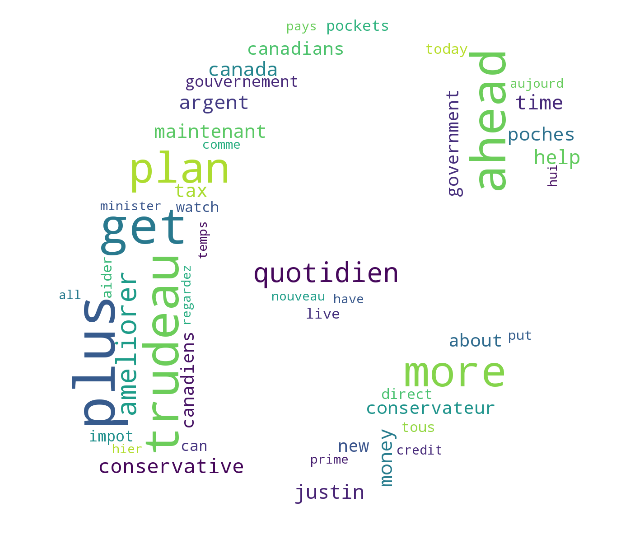

In [204]:
words_dict = words.set_index('words')['count'].to_dict()
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                mask=cpc_mask,
                min_font_size = 5).fit_words(words_dict) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

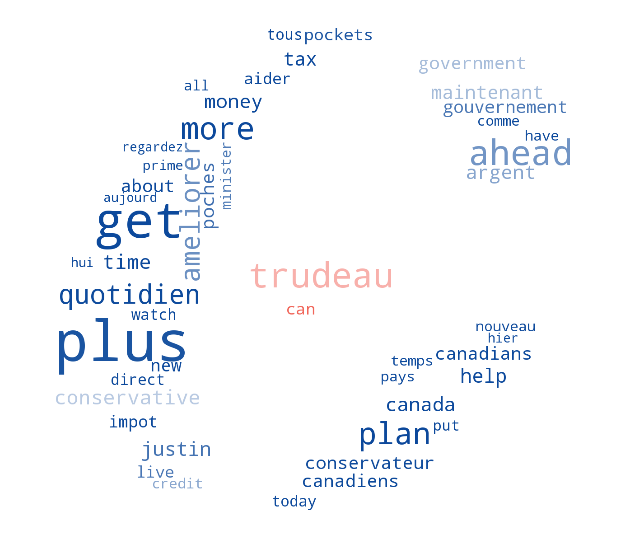

In [206]:
image_colors = ImageColorGenerator(cpc_mask)
words_dict = words.set_index('words')['count'].to_dict()
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                mask=cpc_mask,
                min_font_size = 1).fit_words(words_dict) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
#plt.imshow(wordcloud) 
plt.imshow(wordcloud.recolor(color_func=image_colors)) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
 
plt.show() 

In [38]:
data_df = pd.read_csv("JustinTrudeau_tweets.csv", header=0, delimiter=",")
df = data_df.set_index(pd.DatetimeIndex(pd.to_datetime(data_df['created_at'])))
#df = pd.groupby(df,by=[df.index.month,df.index.year])['text'].apply(lambda x: ' '.join(x)).to_frame()
df_test = df[df.created_at > '2021-08-21']

C:\Users\spezi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
df_test.text[1]

C:\Users\spezi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'From training 1,000 new firefighters, to retrofitting homes to better withstand climate emergencies, and lowering insurance premiums, we’ll make sure Canadians are prepared for the impacts of climate change. https://t.co/TUrmljAnRF'

In [40]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = stop_words,
                                lowercase = True,
                                tokenizer = tokenize,
                                max_df = 0.95, 
                                min_df = 0.05)
dtm_tf = tf_vectorizer.fit_transform(df_test.text.tolist())
print(dtm_tf.shape)

(24, 86)


C:\Users\spezi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=6, random_state=0)
lda_tf.fit(dtm_tf)

C:\Users\spezi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=6, random_state=0)

In [42]:
lda_vis_tf = pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

C:\Users\spezi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
lda_vis_tf


C:\Users\spezi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.214372  0.037518       1        1  31.814018
2      0.136235  0.136315       2        1  20.990888
0      0.003425  0.044524       3        1  18.352142
4     -0.007791 -0.090592       4        1  16.881508
1      0.082968 -0.137184       5        1  10.527266
3     -0.000465  0.009419       6        1   1.434178, topic_info=        Term      Freq     Total Category  logprob  loglift
18      care  8.000000  8.000000  Default  30.0000  30.0000
20     child  6.000000  6.000000  Default  29.0000  29.0000
68        qu  3.000000  3.000000  Default  28.0000  28.0000
30   forward  5.000000  5.000000  Default  27.0000  27.0000
74  services  4.000000  4.000000  Default  26.0000  26.0000
..       ...       ...       ...      ...      ...      ...
45     leave  0.041691  2.245735   Topic6  -4.4543   0.2581
14    better  0.041691  2.245734   Topic6  -4.4543   0.2581
54      more  0.041691  5.390391   Topic6  -4.4543  -0.6175
55      move  0.041691  4.757523   Topic6  -4.4543  -0.4926
73   seniors  0.041691  2.240740   Topic6  -4.4543   0.2603

[250 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         3  0.284581       000
0         4  0.284581       000
0         5  0.284581       000
1         3  0.479620         1
1         5  0.479620         1
...     ...       ...       ...
83        3  0.445289  vaccines
84        3  0.458205      work
84        4  0.458205      work
85        1  0.333864   workers
85        4  0.667728   workers

[156 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 3, 1, 5, 2, 4])

In [44]:
words = word_count(df_test.text, tf_vectorizer)

C:\Users\spezi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
lpc_mask = np.array(Image.open("lpc_logo.jpg"))

C:\Users\spezi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\spezi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


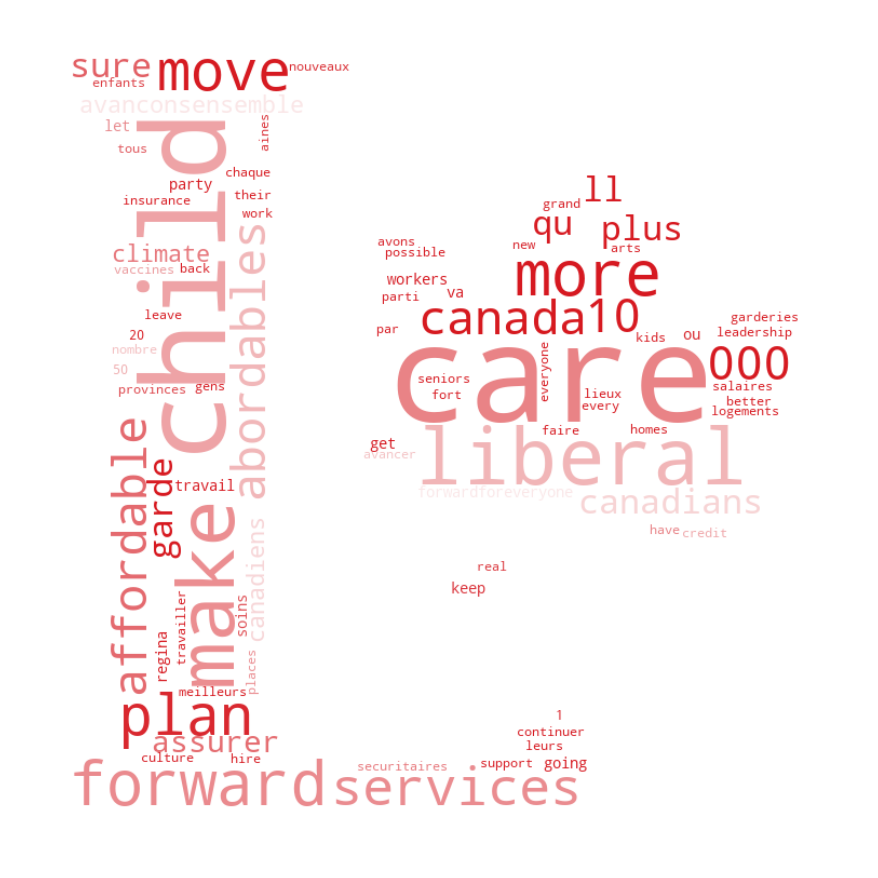

In [63]:
image_colors = ImageColorGenerator(lpc_mask)
words_dict = words.set_index('words')['count'].to_dict()
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                mask=lpc_mask,
                min_font_size = 1).fit_words(words_dict) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
#plt.imshow(wordcloud) 
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
timestamp = dt.now().strftime("%Y%m%d_%H-%M-%S")
plt.savefig(timestamp + "_Justin_Trudeau_Tweets.png", dpi=300) 
plt.show() 